In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
crime_data = pd.read_excel('C:/Users/michelj8/Documents/GitHub/expo_smooth_lasso/integer_valued_ts/crime_480_data.xlsx')
# "C:\Users\michelj8\Documents\GitHub\expo_smooth_lasso\integer_valued_ts\crime_888_data.xlsx"

In [102]:
crime_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,191506964,2019-02-25,2019-02-25,2325,15,N Hollywood,1557,1,480,BIKE - STOLEN,...,IC,Invest Cont,480,NaN,NaN,NaN,5000 CARTWRIGHT AV,NaN,34.1613,-118.3637
1,190128566,2019-12-05,2019-12-04,2230,1,Central,152,1,480,BIKE - STOLEN,...,IC,Invest Cont,480,NaN,NaN,NaN,7TH,FLOWER ST,34.0487,-118.2588
2,190615415,2019-07-13,2019-07-13,1830,6,Hollywood,666,1,480,BIKE - STOLEN,...,IC,Invest Cont,480,NaN,NaN,NaN,6300 W SUNSET BL,NaN,34.0980,-118.3267
3,190606178,2019-01-30,2019-01-01,1050,6,Hollywood,669,1,480,BIKE - STOLEN,...,IC,Invest Cont,480,NaN,NaN,NaN,5300 LEXINGTON AV,NaN,34.0930,-118.3046
4,190104755,2019-01-12,2019-01-09,2200,1,Central,158,1,480,BIKE - STOLEN,...,IC,Invest Cont,480,NaN,NaN,NaN,800 E 6TH ST,NaN,34.0408,-118.2428


In [115]:
crime_data['Crm Cd Desc'].unique()

array(['BIKE - STOLEN'], dtype=object)

In [103]:
ts_df = crime_data.groupby(['DATE OCC']).count()[['DR_NO']].reset_index()
ts_df['year-month'] = ts_df['DATE OCC'].apply(lambda s: str(s)[0:7])

ts_df = ts_df.groupby('year-month').sum()
ts_df.columns = ['Y']

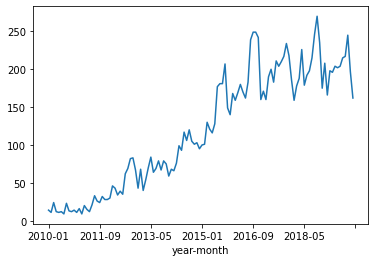

In [104]:
ts_df['Y'].plot()

In [105]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(ts_df, (1,0)).fit()
model.params

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      109.783877
ar.L1.Y      0.964032
dtype: float64

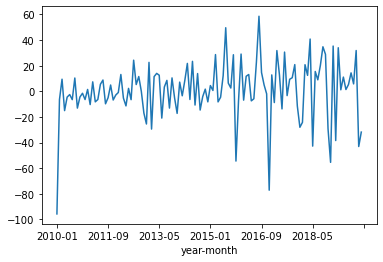

In [106]:
model.resid.plot()

# Add in transformations and plots

In [107]:
ts_df['delta'] = ts_df['Y'].diff(1)
ts_df['abs_delta'] = np.abs(ts_df['delta'])

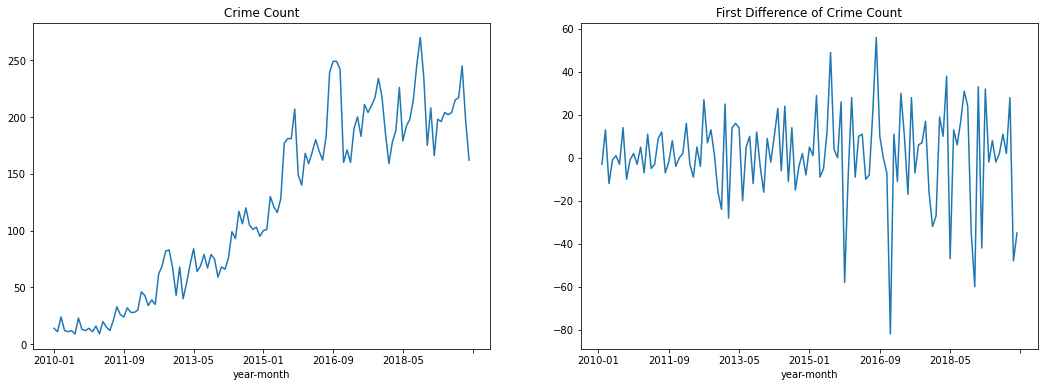

In [108]:
fig, ax  = plt.subplots(1,2, figsize = (18,6))

ts_df['Y'].plot(ax = ax[0], title = 'Crime Count')
ts_df['delta'].plot(ax = ax[1], title = 'First Difference of Crime Count')

In [109]:
ts_df['delta'].describe()

count    119.000000
mean       1.243697
std       20.946650
min      -82.000000
25%       -7.500000
50%        2.000000
75%       12.500000
max       56.000000
Name: delta, dtype: float64

In [110]:
rolling_summary_df = pd.DataFrame(columns = ['mean','var','abs','sign'])

rolling_summary_df['mean'] = ts_df['delta'].rolling(window = 12).mean()
rolling_summary_df['var'] = np.square(ts_df['delta'].rolling(window = 12).std())
rolling_summary_df['abs'] = np.abs(ts_df['delta']).rolling(window = 12).mean()
rolling_summary_df['sign'] = np.sign(ts_df['delta']).rolling(window = 12).mean()

C:\Users\michelj8\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sign
  result = getattr(ufunc, method)(*inputs, **kwargs)


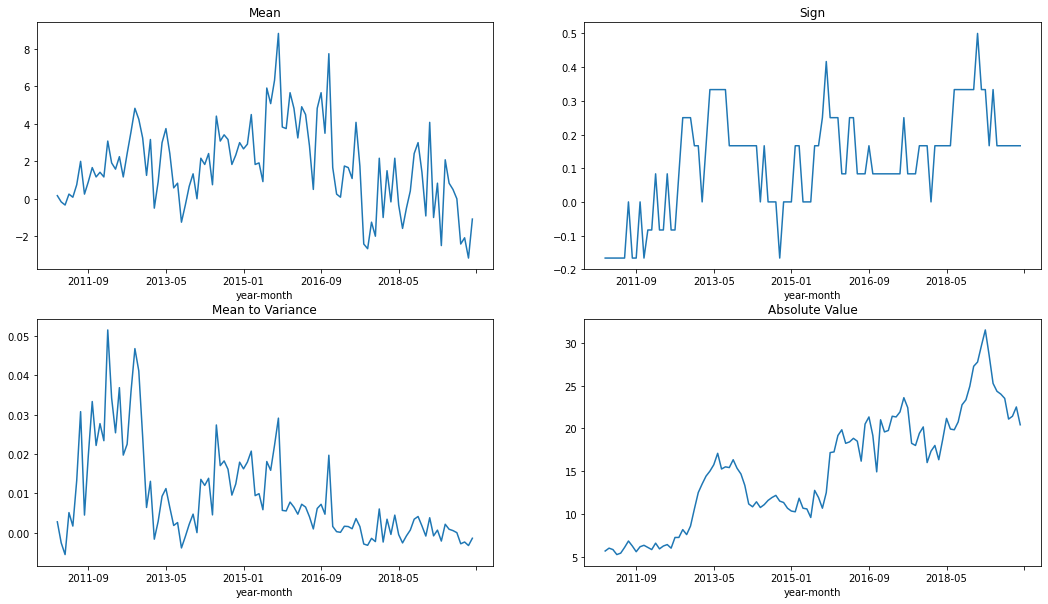

In [113]:
fig, ax = plt.subplots(2,2, figsize = (18,10))

rolling_summary_df['mean'].plot(ax = ax[0][0], title = 'Mean')
# rolling_summary_df['var'].plot(ax = ax[1][0], title = 'Variance')
(rolling_summary_df['mean']/rolling_summary_df['var']).plot(ax = ax[1][0], title = 'Mean to Variance')
rolling_summary_df['sign'].plot(ax = ax[0][1], title = 'Sign')
rolling_summary_df['abs'].plot(ax = ax[1][1], title = 'Absolute Value')

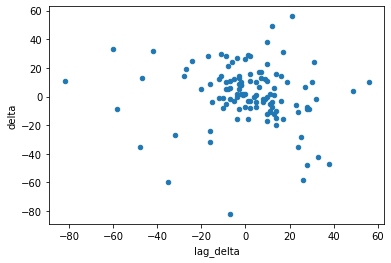

In [118]:
ts_df['lag_delta'] = ts_df['delta'].shift(1)
ts_df['abs_delta'] = np.abs(ts_df['delta'])
ts_df.plot.scatter(x='lag_delta',y='delta')

In [119]:
from statsmodels.tsa.stattools import acf, pacf
acf(ts_df['delta'].dropna())

C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.12523434, -0.02143841, -0.14209078, -0.22022475,
       -0.03075918,  0.05838239,  0.17418154, -0.23826606, -0.08016097,
       -0.08057162,  0.07644729,  0.27656177,  0.27822527, -0.10010017,
       -0.00982147, -0.23516118, -0.05011073,  0.07243819,  0.03689744,
       -0.08199421, -0.13293368, -0.08175125,  0.07767422,  0.29060687,
       -0.03195789,  0.16375494, -0.07587524, -0.13703773, -0.02391245,
        0.0119034 ,  0.00581892, -0.12545412,  0.03851128, -0.14494272,
        0.00146153,  0.32193605,  0.05639019, -0.04097233,  0.07299143,
       -0.20617797])

const          0.982210
ar.L1.delta   -0.471117
dtype: float64


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


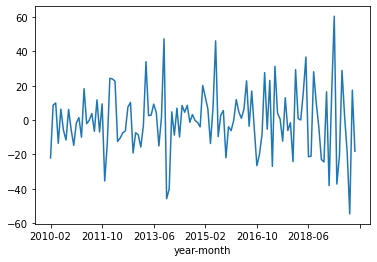

In [10]:
model = ARMA(ts_df['delta'].dropna(), (1,0)).fit()
print(model.params)
model.resid.plot()

const              16.438673
ar.L1.abs_delta     0.370576
dtype: float64


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


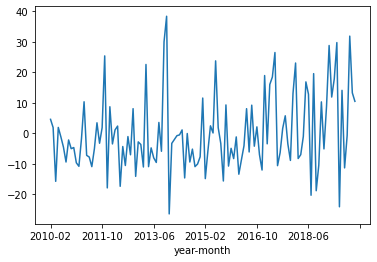

In [11]:
model = ARMA(ts_df['abs_delta'].dropna(), (1,0)).fit()
print(model.params)
model.resid.plot()

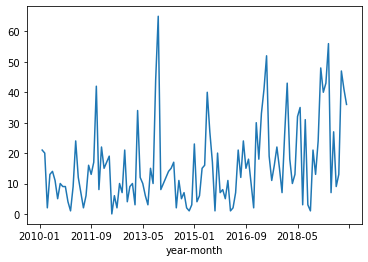

In [12]:
ts_df['abs_delta'].plot()

In [14]:
model = ARMA(ts_df['sign_dif'].dropna(), (1,0)).fit()
print(model.params)

const             0.054988
ar.L1.sign_dif   -0.347002
dtype: float64


C:\Users\michelj8\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


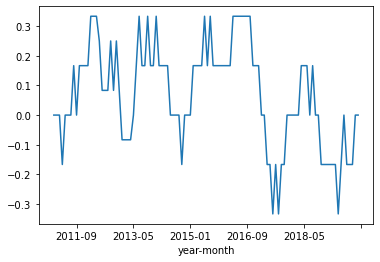

In [31]:
ts_df['sign_dif'].rolling(window = 12).mean().plot()

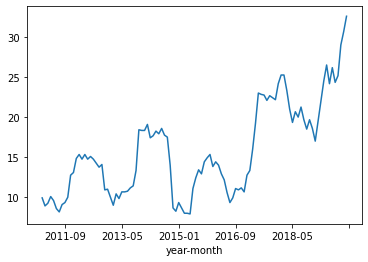

In [33]:
ts_df['abs_delta'].rolling(window = 12).mean().plot()

In [16]:
ts_df['delta_lag'] = ts_df['delta'].shift(1)

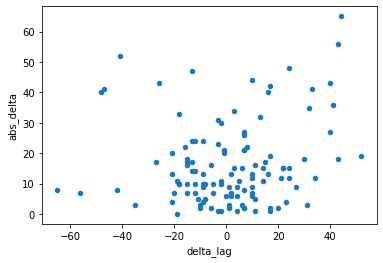

In [17]:
ts_df.plot.scatter(x='delta_lag' ,y='abs_delta')

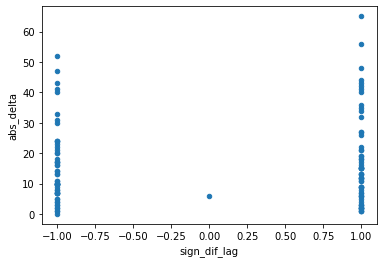

In [18]:
ts_df['sign_dif_lag'] = ts_df['sign_dif'].shift(1)
ts_df.plot.scatter(x='sign_dif_lag',y='abs_delta')

In [19]:
print (ts_df[['sign_dif_lag','abs_delta']].groupby('sign_dif_lag').mean(), ts_df[['sign_dif_lag','abs_delta']].groupby('sign_dif_lag').std() )

              abs_delta
sign_dif_lag           
-1.0          15.309091
 0.0           6.000000
 1.0          17.306452               abs_delta
sign_dif_lag           
-1.0          12.265388
 0.0                NaN
 1.0          14.821992


# Estimation

In [20]:
def ingarch_filter(w,a,b, con,r,p):
    dates = ts_df.index
    mu_est = [ts_df.loc[dates[1],'abs_delta'] ]
    p_est = [.5]
    
    for date in dates[2:]:
        y = ts_df.loc[date,'abs_delta']
        s = sgn(ts_df.loc[date,'delta'])
        mu_est.append(w + a*y + b*mu_est[-1])
        p_est.append(con + p*s + r*p_est[-1])
    
    filter_df = pd.DataFrame({'mu':mu_est,'prob':p_est})
    filter_df['year-month'] = dates[1:]
    return filter_df.set_index('year-month')

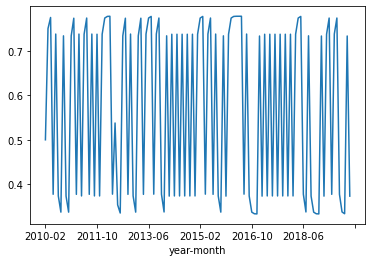

In [21]:
ingarch_filter(.1,.2,.5, .5,.1,.2)['prob'].plot()

In [22]:
ts_df.head()

,Y,delta,abs_delta,sign_dif,delta_lag,sign_dif_lag
year-month,,,,,,
2010-01,127,NaN,NaN,NaN,NaN,NaN
2010-02,106,-21.0,21.0,-1.0,NaN,NaN
2010-03,126,20.0,20.0,1.0,-21.0,-1.0
2010-04,128,2.0,2.0,1.0,20.0,1.0
2010-05,115,-13.0,13.0,-1.0,2.0,1.0


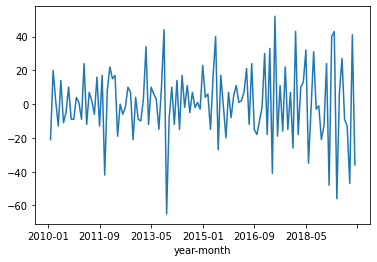

In [23]:
ts_df['delta'].plot()

In [27]:
print(ts_df['delta'].max(), ts_df['delta'].min())

52.0 -65.0


In [28]:
ts_df['delta'].median()

1.0